# Recursion and Memoization: More Examples
Today, we will look at a few problems where recursion and memoization combine to give us a solution that we can derive using a "wishful thinking" approach (and therefore simple to write recursively), which is also efficient.

In [2]:
%config InteractiveShell.ast_node_interactivity="none"

In [16]:
!wget https://raw.githubusercontent.com/jamcoders/syllabus-resources-2023/main/week3/lecs/boaz_utils.ipynb
%run "boaz_utils.ipynb"

# The Coin Change Problem
Given a set $S$ of coin denominations, what is the minimum number of coins needed to make change for a given $n$?

For example, in Jamaica, we have coin denominations of \\$1, \\$5, \\$10, \\$20. (We are ignoring the "red" money coins that are denominated less than 1 dollar.)  

The best way to make change for \\$15 is (\\$10, \\$5).  We could also make \\$15 with 15 \\$1 coins, or 3 \\$5 coins, and others, but they all use more than the two coins that the \\$10 and \\$5 combination used.

In our discussions today, we are asking for the coin combinations that sum up to the given amount, but there are also variations of this problem that ask for the number of ways to make change for the given amount.

## The Greedy Approach
Let us write a program to make (coin) change for a given amount of Jamaican currency.  We shall generalize eventually, but it is useful to think about this step by step. (Often a good approach when trying to solve hard problems).

When you make change in your daily activities, how do you do it?

In [29]:
def make_change_jam(amt):
    rem = amt
    result = []
    while rem >= 20:
        rem -= 20
        result.append(20)
    while rem >= 10:
        rem -= 10
        result.append(10)
    while rem >= 5:
        rem -= 5
        result.append(5) 
    while rem >= 1:
        rem -= 1
        result.append(1) 
    return result

In [30]:
print(make_change_jam(8))
print(make_change_jam(99))

[5, 1, 1, 1]
[20, 20, 20, 20, 10, 5, 1, 1, 1, 1]


**DRY = Don't Repeat Yourself**
It's a good idea to "keep your code DRY"

Let us rewrite it to capture the repeating pattern with a loop instead

In [31]:
def make_change_jam(amt):
    rem = amt
    result = []
    for coin in [20, 10, 5, 1]:
        while rem >= coin:
            rem -= coin
            result.append(coin)
    return result

In [32]:
print(make_change_jam(8))
print(make_change_jam(99))

[5, 1, 1, 1]
[20, 20, 20, 20, 10, 5, 1, 1, 1, 1]


Now, what if we wanted to have our code work for any country?  For example, in the US, they have a 25c coin (called a "quarter").  Can we generalize our code?

In [34]:
def make_change(amt, coins):
    coins = sorted(coins, reverse=True)
    rem = amt
    result = []
    for coin in coins:
        while rem >= coin:
            rem -= coin
            result.append(coin)
    return result

In [35]:
print(make_change(30, [1, 5, 10, 25]))

[25, 5]


In [36]:
print(make_change(8, [1, 2, 4, 5]))

[5, 2, 1]


We see that our implementation strategy doesn't work in general.

(Where did we go wrong?)

To fix this, we will have to check all the possibilities in search of the one with the fewest coins.

## Enter Recursion
Consider how you would set up a loop to go through all possible combinations. (It's not that easy, is it?)

Instead, try to think of a way to describe the best coin combination in a recursive way.
- What is the sub-problem that you wish you had a solution to?
- What would the corresponding base cases be?
- How would the solutions to the sub-problems be composed to produce the final answer?

Method 1: We could consider whether our solution contains the first coin or not.
- If it does, then we use "wishful thinking" to make change for the amount reduced by the first coin, using the same set of coins.
- If it does not, then we use "wishful thinking" to make change for the same amount, but with a smaller set of coins.
- When we get the answers back, we have to add the first coin to the wishful thinking solution in the case when we used it, and then compare that to the other solution to choose the shorter one.

Base cases:
- if `amt` = 0 then the solution is `[]`, the empty list
- if `coins` is empty then there is no solution
- if `amt` is negative then there is no solution

**Issue:** It is tempting to use empty list (`[]`) as the base case for when the list of coins is empty and when the amount is 0, but this would be a mistake. We need to have base cases that distinguish between these scenarios because the sum of an empty list is 0, and therefore technically correctly represents giving back 0 change.   

In [46]:

def make_change(amt, coins):
    if amt == 0:
        return []
    elif amt < 0 or coins == []:
        return None
    else:
        first, *others = coins
        w_first = make_change(amt - first, coins)
        wo_first = make_change(amt, others)
        if w_first is not None:
            w_first_result = [first] + w_first
            if wo_first is not None:
                if len(w_first_result) <= len(wo_first):
                    return w_first_result
                else:
                    return wo_first
            else:
                return w_first_result
        elif wo_first is not None:
            return wo_first
        else:
            return None

In [56]:
print(make_change(8, [1, 2, 4, 5]))

[4, 4]


If all of the checks for `None` make the code too confusing, try to rewrite it so that you never make a recursive call if no solution would exist.  (This will move the `if` checks to before the recursive calls, and might produce code that is easier to follow).  When developing solutions, these sorts of iterative improvements are natural.

(This implementation follows)

In [57]:
def alt_make_change(amt, coins):
    if amt == 0:
        return []
    else:
        first, *others = coins
        result = None
        if amt >= first:
            w_first = make_change(amt - first, coins)
            result = [first] + w_first
        if len(others) > 0:
            wo_first = make_change(amt, others)
            if result == None:
                result = wo_first
            elif len(wo_first) < len(result):
                result = wo_first
            else:
                pass  # result is fine as is
        return result
                    

In [58]:
print(alt_make_change(8, [1, 2, 4, 5]))

[4, 4]


An alternative (but still recursive) approach. This one proceeds a lot slower.

In [48]:
# A simpler recursive approach (but much slower)
def make_change2(n, coins):  
  if n == 0:
    return []
  ans = -1
  for coin in coins:
    if n >= coin:
      possibility = [coin] + make_change2(n - coin, coins)
      if ans == -1 or len(possibility) < len(ans):
        ans = possibility
  ans.sort(reverse=True)
  return ans

In [51]:
# We test with small n, it takes too long with larger n
print(make_change2(8, [1, 2, 4, 5]))

[4, 4]


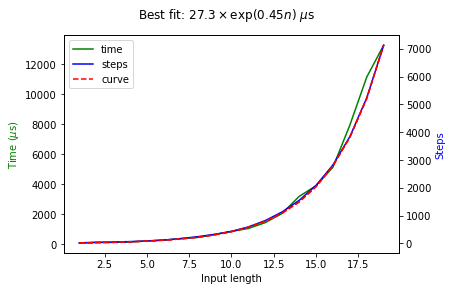

In [53]:
# Don run this cell--it's magic we use to estimate how long it would take to run
%run boaz_utils.ipynb
inputs = [[i, [20, 10, 5, 1]] for i in range(1, 20)]
(curve,lengths,times,steps,outputs) = timer(make_change2,inputs,inlen=lambda pair: pair[0], doplot_logscale=False)

In [61]:
microseconds = 27.3 * np.exp(0.45 * 99) 
seconds = microseconds / 1_000_000
years = seconds / 365 / 24 / 60 / 60
print(f"On n=99, it would take make_change2 about {years:.2f} years to compute change for $99!")

On n=99, it would take make_change2 about 19283026.98 years to compute change for $99!


## Post-Lecture Sidebar Discussion
During lecture I was surprised at how quickly `make_change` returned, and I tried giving it larger values of `n` to motivate the need for memoization.  Interestingly, it was still fast even with `n` well above 100.  I investigated a bit further and found the following:

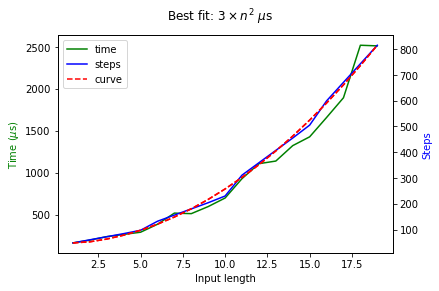

In [55]:
%run boaz_utils.ipynb
inputs = [[i, [20, 10, 5, 1]] for i in range(1, 20)]
(curve,lengths,times,steps,outputs) = timer(make_change,inputs,inlen=lambda pair: pair[0], doplot_logscale=False)

The time complexity curve above indicates that the order of growth of the first implementation of `make_change` is $O(n^2)$. To be more precise it says that the actual amount of time is approximately $3n^2$ microseconds, where $n$ is the first argument (i.e. the amount of change to be made).  This explains why it appeared to be very fast, even for $n = 100$, since $3 \times 100^2 \mu s = 3 \times 10^4 \mu s = 0.03 s$.

### Where is the exponential hiding?
However, as I indicated the presence of 2 recursive calls on only gradually decreasing input sizes indicates that we should expect exponential behaviour. It's just that the exponential behaviour would be in the length of the list of coins, not the amount being changed.

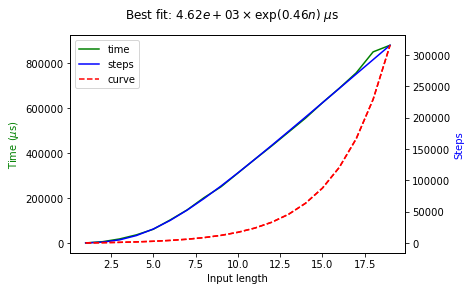

In [62]:
%run boaz_utils.ipynb
inputs = [[20, list(range(1, i))] for i in range(2, 21)]
(curve,lengths,times,steps,outputs) = timer(make_change,inputs,inlen=lambda pair: len(pair[1]), doplot_logscale=False)

The best fit function is exponential, but notice that it is not a very good fit to the actual data.  So, it is inconclusive. 

If you are still interested, you are encouraged to explore the space of inputs to get a better fitting curve and see what the order of growth of the actual measured time is. 